### Get a map with a place name and project it.

In [2]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, matplotlib as mpl
%matplotlib inline
G = ox.graph_from_place('Piedmont, California, USA')
G_projected = ox.project_graph(G)

### Nodes in this network are street junctions. 

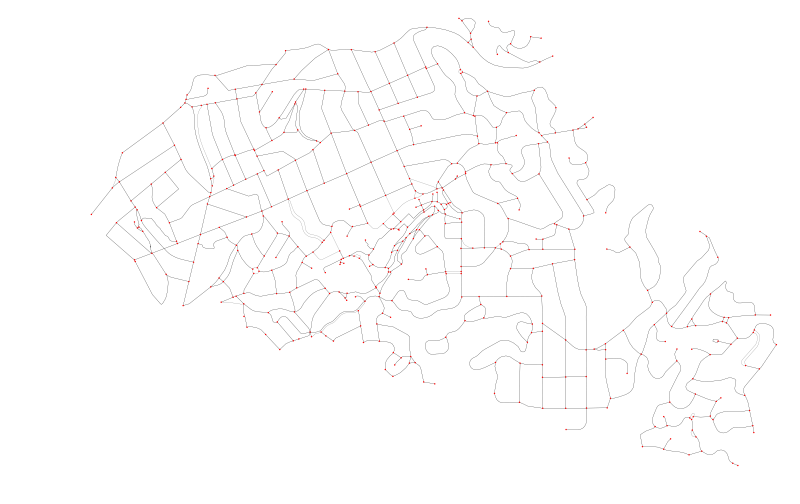

In [5]:
fig, ax = ox.plot_graph(G_projected, node_size=1, node_color='r', node_zorder=2, 
                        edge_color='k', edge_linewidth=0.1, edge_alpha=0.8)

### Let's create a line graph so that the edges becomes nodes in the new graph.

In [ ]:
L=nx.line_graph(G_projected)

### We are going to color streets with their closeness centralities.

In [8]:
edge_clo = nx.closeness_centrality(L)
ev = [edge_clo[edge + (0,)] for edge in G_projected.edges()]

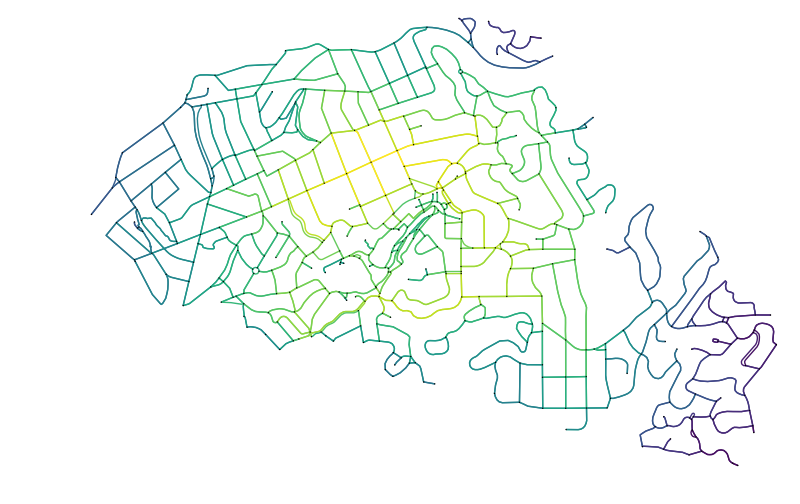

In [9]:
norm = mpl.colors.Normalize(vmin=min(ev), vmax=max(ev))
m = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ecol= [m.to_rgba(cl) for cl in ev]

fig, ax = ox.plot_graph(G_projected, node_size=1, node_color="#000000", node_zorder=2,
                        edge_color=ecol, edge_linewidth=1, edge_alpha=1)